<a href="https://colab.research.google.com/github/NMengo/Data-Science/blob/main/Img_processing_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, Conv2D
from keras.datasets import fashion_mnist

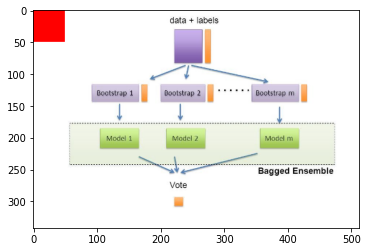

In [3]:
# Manipulating 3 color images
data = plt.imread('bagging.png')

# Set the red channel in this part of the image to 1
data[0:50, 0:50, 0] = 1

# Set the green channel in this part of the image to 0
data[0:50, 0:50, 1] = 0

# Set the blue channel in this part of the image to 0
data[0:50, 0:50, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

In [6]:
categories = np.array(["shirt", "dress", "shoe"])
labels = np.random.choice(categories, 20)
labels

array(['shoe', 'dress', 'shoe', 'shoe', 'shoe', 'shirt', 'shoe', 'dress',
       'dress', 'shoe', 'shoe', 'shirt', 'dress', 'shoe', 'shoe', 'dress',
       'shoe', 'dress', 'dress', 'shirt'], dtype='<U5')

In [9]:
# Manual One-Hot encoding
# The number of image categories
n_categories = 3

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(labels[ii]==categories)
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1
ohe_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [10]:
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Calculate the number of correct predictions
number_correct = np.sum(test_labels*predictions)
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(test_labels)
print(proportion_correct)

6.0
0.75


In [97]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [98]:
X_train, y_train, X_test, y_test = X_train[:50], y_train[:50], X_test[:50], y_test[:50]
X_train.shape

(50, 28, 28)

In [48]:
categories = np.append(y_train, y_test)
categories = list(set(categories))

def oh_enc(targets, categories):
  encoded = np.zeros((len(targets), len(categories)))

  for i in range(len(targets)):
    idx = np.where(targets[i] == categories)
    encoded[i, idx] = 1

  return encoded

In [61]:
# First we should build the model.
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [62]:
# Then we compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Before fitting the images, we need to flatten them as the model expects an input of (50,784)
X_train = X_train.reshape((50,784))
X_test = X_test.reshape((50,784))

In [64]:
# Also, labels must be OneHot Encoded
enc_labels_train = oh_enc(y_train, categories)
enc_labels_test = oh_enc(y_test, categories)

In [65]:
# Then we fit the model
model.fit(X_train, enc_labels_train, validation_split=0.2, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 162ms/step - loss: 136.8388 - accuracy: 0.1000 - val_loss: 92.0292 - val_accuracy: 0.4000
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 49.5542 - accuracy: 0.3750 - val_loss: 49.8677 - val_accuracy: 0.4000
Epoch 3/20
2/2 [==============================] - 0s 27ms/step - loss: 22.5024 - accuracy: 0.4500 - val_loss: 41.8530 - val_accuracy: 0.4000
Epoch 4/20
2/2 [==============================] - 0s 28ms/step - loss: 25.8028 - accuracy: 0.6000 - val_loss: 29.2315 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 26ms/step - loss: 13.4928 - accuracy: 0.6500 - val_loss: 16.3277 - val_accuracy: 0.4000
Epoch 6/20
2/2 [==============================] - 0s 31ms/step - loss: 3.9248 - accuracy: 0.7500 - val_loss: 25.2489 - val_accuracy: 0.3000
Epoch 7/20
2/2 [==============================] - 0s 25ms/step - loss: 9.5402 - accuracy: 0.6750 - val_loss: 20.0554 - val_accuracy: 0.3000
Epoch 8/20
2/

In [66]:
# Evaluation on test set
model.evaluate(X_test, enc_labels_test)

2/2 [==============================] - 0s 6ms/step - loss: 22.2950 - accuracy: 0.5400


[22.294984817504883, 0.5400000214576721]

In this last case, we worked with fully connected layers in order to process images.
In this case it is possible since **we are working with small 1-color images. Meaning that parameters won't scale that much.**

Anyhow, for img processing a whole architecture made by FCL is not ideal since in this case we loose spatial information.

So, we use CNNs.  
What is a Convolution?

In [67]:
a = np.array([0,0,0,0,0,1,1,1,1,1])
kernel = np.array([-1, 1]) # Defines the feature we are looking for.

In [ ]:
# We slide the kernel through the array.
conv[0] = (kernel * a[0:2]).sum()
conv[1] = (kernel * a[1:3]).sum()
conv[2] = (kernel * a[2:4]).sum()
conv[3] = (kernel * a[5:6]).sum()

In [70]:
def convolute1d(array, kernel):
  conv = np.array(np.zeros(len(array)))
  for i in range(8):
    conv[i] = (kernel * array[i:i+len(kernel)]).sum()
  return conv

convolute1d(a, kernel)
# This kernel does not react to [0,0] nor [1,1] combinations.
# Only when gets [1,0] or [0,1] combinations.

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [72]:
b = np.random.choice([1,0], 10)
print(b)
convolute1d(b, kernel)

[1 0 1 1 0 0 0 1 0 0]


array([-1.,  1.,  0., -1.,  0.,  0.,  1., -1.,  0.,  0.])

In images, this convolution happens in a 2-D fashion.

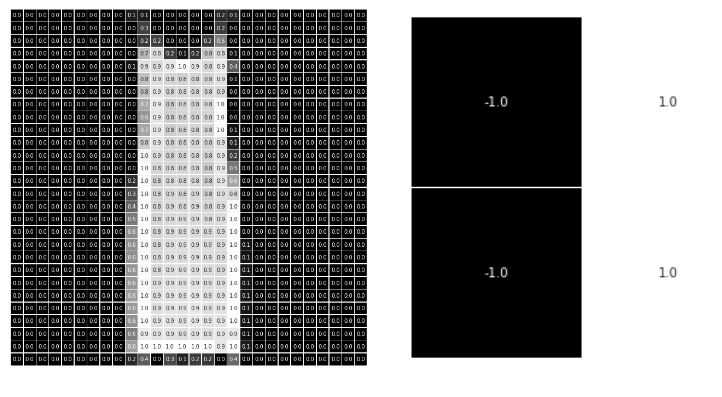   

This kernel matches vertical edges on the left   

When we convolve the image with this kernel, the result is the following feature map.  



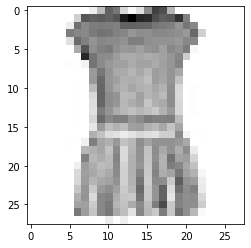

In [90]:
dress = X_train[3].reshape(28,28)
plt.imshow(dress, cmap='Greys')
plt.show()

In [81]:
def convolute2d(tensor, kernel):
  t_shape = np.array(tensor.shape)-1
  k_shape = kernel.shape[0]
  conv = np.zeros(t_shape)

  for i in range(t_shape[0]):
    for j in range(t_shape[1]):
      # We look at the image in a window with the same size of the kernel.
      window = tensor[i:i+k_shape, j:j+k_shape]
      # By Matrix-multiplication and the agg of its results, we get the value of 1 pixel of the feature map
      conv[i, j] = np.sum(window*kernel) 
  return conv

In [82]:
# Two-dimensional convolution
kernel2 = np.array([[-1, 1], [-1,1]])

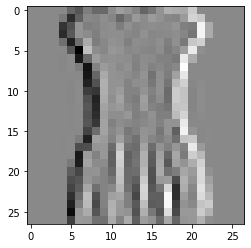

In [88]:
img = X_train[3].reshape(28,28)
conv = convolute2d(img, kernel2)
plt.imshow(conv, cmap='binary')
plt.show()

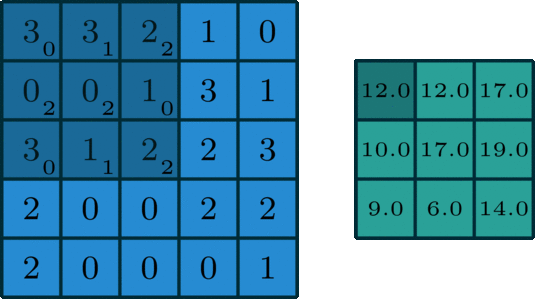

The difference between filter and kernel is a bit tricky. Sometimes, they are used interchangeably, which could create confusions. Essentially, these two terms have subtle difference. A “Kernel” refers to a 2D array of weights. The term “filter” is for 3D structures of multiple kernels stacked together. For a 2D filter, filter is same as kernel. But for a 3D filter and most convolutions in deep learning, a filter is a collection of kernels. Each kernel is unique, emphasizing different aspects of the input channel.

With these concepts, the multi-channel convolution goes as the following. Each kernel is applied onto an input channel of the previous layer to generate one output channel. This is a kernel-wise process. We repeat such process for all kernels to generate multiple channels. Each of these channels are then summed together to form one single output channel. The following illustration should make the process clearer.

Here the input layer is a 5 x 5 x 3 matrix, with 3 channels. The filter is a 3 x 3 x 3 matrix. First, each of the kernels in the filter are applied to three channels in the input layer, separately. Three convolutions are performed, which result in 3 channels with size 3 x 3.

**From an RGB point of view**  
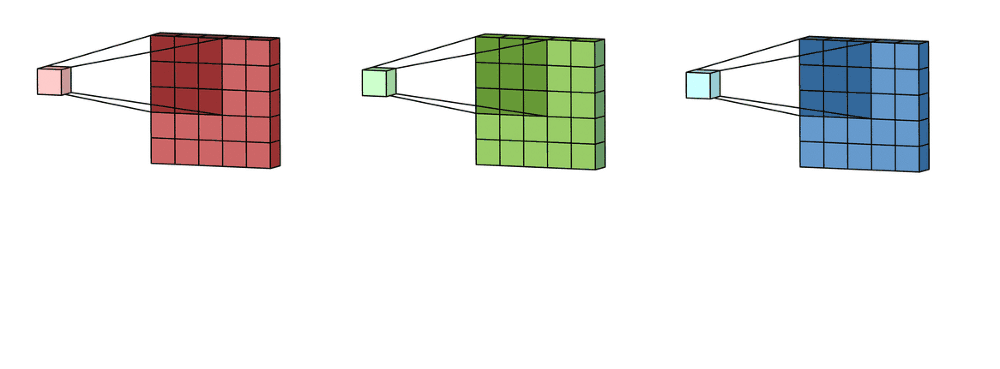

Then these three channels are summed together (element-wise addition) to form one single channel (3 x 3 x 1). This channel is the result of convolution of the input layer (5 x 5 x 3 matrix) using a filter (3 x 3 x 3 matrix).  

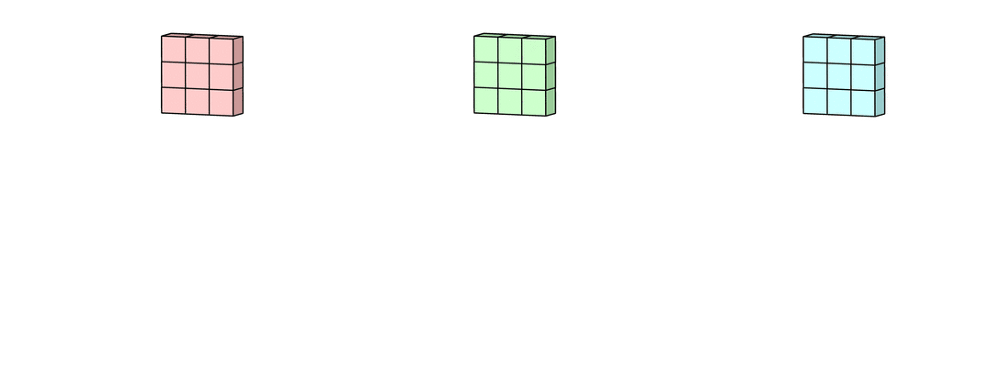

Kernel size: kernel is discussed in the previous section. The kernel size defines the field of view of the convolution.  

Stride: it defines the step size of the kernel when sliding through the image. Stride of 1 means that the kernel slides through the image pixel by pixel. Stride of 2 means that the kernel slides through image by moving 2 pixels per step (i.e., skipping 1 pixel). We can use stride (>= 2) for downsampling an image.  

Padding: the padding defines how the border of an image is handled. A padded convolution (‘same’ padding in Tensorflow) will keep the spatial output dimensions equal to the input image, by padding 0 around the input boundaries if necessary. On the other hand, unpadded convolution (‘valid’ padding in Tensorflow) only perform convolution on the pixels of the input image, without adding 0 around the input boundaries. The output size is smaller than the input size.    

This following illustration describes a 2D convolution using a kernel size of 3, stride of 1 and padding of 1.

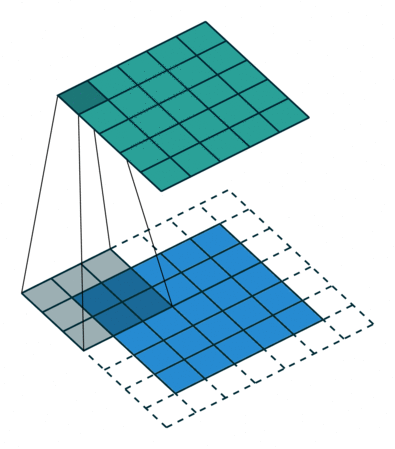

https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215

If we have a very deep neural network, maybe we would like to apply a Zero-padding kernel. By not doing this, we would be loosing a pixel of the edge of the image in each layer. By doing this, the feature map keeps same shape as kernel.

**Calculating size of the output.**

O = ((Input - Kernel + 2ZeroPadding) / Strides) + 1

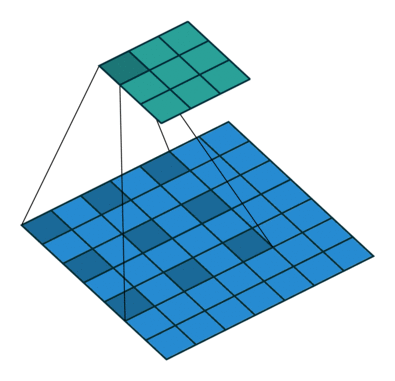

**Dilated Convolution**

Dilated Convolution: It is a technique that expands the kernel (input) by inserting holes between its consecutive elements. In simpler terms, it is the same as convolution but it involves pixel skipping, so as to cover a larger area of the input. 

An additional parameter l (dilation factor) tells how much the input is expanded. In other words, based on the value of this parameter, (l-1) pixels are skipped in the kernel. Fig 1 depicts the difference between normal vs dilated convolution. In essence, normal convolution is just a 1-dilated convolution

Intuition: 

Dilated convolution helps expand the area of the input image covered without pooling. The objective is to cover more information from the output obtained with every convolution operation. This method offers a wider field of view at the same computational cost. We determine the value of the dilation factor (l) by seeing how much information is obtained with each convolution on varying values of l.  

In [ ]:
# Define a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

In [ ]:
# Define a kernel that finds horizontal lines in images.
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

**CONV2D layers resembles the "Dense" layers, but instead of having every unit in the layer connected to every unit in the previous layer, these connect to the previous layer through a convolution kernel.**  

**During training of a neural network that has convolutional layers, the kernels in each unit would be adjusted using back-propagation.**  

**In this sense, the principle is the same as learning in the Dense layers that we have seen so far, but with fewer weights. A dense layer has one weight for each pixel in the image, but a convolution layer has only one weight for each pixel in the kernel.**

For example, if we set the kernel_size argument to 3, that means that the   kernel of each unit has 9 pixels. If the layer has 10 units, it would have 90   parameters for these kernels.

In [103]:
# In this case, as it is a convolution, we do not need to flatten the img in the input.
model2 = Sequential()
model2.add(Conv2D(100, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

In [104]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
model2.fit(X_train, enc_labels_train, validation_split=0.2, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 172ms/step - loss: 32.2131 - accuracy: 0.0750 - val_loss: 336.1242 - val_accuracy: 0.4000
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 209.9409 - accuracy: 0.5000 - val_loss: 454.3341 - val_accuracy: 0.2000
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 260.0482 - accuracy: 0.3250 - val_loss: 266.1175 - val_accuracy: 0.6000
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 121.3863 - accuracy: 0.6000 - val_loss: 193.6278 - val_accuracy: 0.4000
Epoch 5/20
2/2 [==============================] - 0s 38ms/step - loss: 75.1622 - accuracy: 0.7250 - val_loss: 219.7495 - val_accuracy: 0.2000
Epoch 6/20
2/2 [==============================] - 0s 38ms/step - loss: 64.4315 - accuracy: 0.5750 - val_loss: 148.1183 - val_accuracy: 0.4000
Epoch 7/20
2/2 [==============================] - 0s 36ms/step - loss: 25.0038 - accuracy: 0.7750 - val_loss: 132.0202 - val_accuracy: 0.3000
Ep

In [110]:
model2.evaluate(X_test, enc_labels_test)

2/2 [==============================] - 0s 11ms/step - loss: 75.6531 - accuracy: 0.5000


[75.65308380126953, 0.5]